# CHAOS Visualization of the Mouse Spleen Dataset

## Loading Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../Mouse_Spleen/')
sys.path.append('../../../')
from Model.utils import calculate_chaos

## Loading Data

In [ ]:
slices = ['1', '2']  ## 1, 2
# List of methods
methods = ['SpaKnit', 'SpatialGlue', 'Seurat', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2']
# Create a dictionary to store data for each slice
adata_results = {}

# Load data and store it
for slice_name in slices:
    path = f'../../Mouse_Spleen_Replicate{slice_name}.h5ad'
    result = sc.read_h5ad(path)
    adata_results[slice_name] = {
        'adata': result,
        'chaos_scores': {}
    }

In [26]:
adata_results

{'1': {'adata': AnnData object with n_obs × n_vars = 2568 × 0
      obs: 'SpaKnit', 'SpatialGlue', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'Seurat'
      uns: 'MultiMAP_colors', 'Seurat_colors'
      obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'Seurat', 'SpaKnit', 'SpatialGlue', 'spatial',
  'chaos_scores': {}},
 '2': {'adata': AnnData object with n_obs × n_vars = 2768 × 0
      obs: 'SpaKnit', 'SpatialGlue', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'Seurat'
      uns: 'Seurat_colors', 'SpaKnit_colors'
      obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'Seurat', 'SpaKnit', 'SpatialGlue', 'spatial',
  'chaos_scores': {}}}

## Calculating CHAOS

In [ ]:
for slice_name, data in adata_results.items():
    adata = data['adata']  # Assume data is an AnnData object
    spatial_coords = adata.obsm['spatial']  # Retrieve spatial coordinates
    for method in adata.obs.columns:  # Iterate over each method
        labels = adata.obs[method].values  # Retrieve clustering labels
        chaos_values = calculate_chaos(spatial_coords, labels)  # Calculate CHAOS scores
        data['chaos_scores'][method] = chaos_values  # Store CHAOS scores

## Ploting

Drawing plot for 1 - CHAOS Score


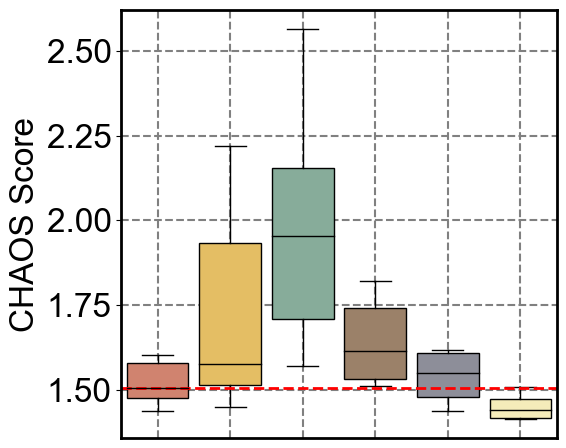

Drawing plot for 2 - CHAOS Score


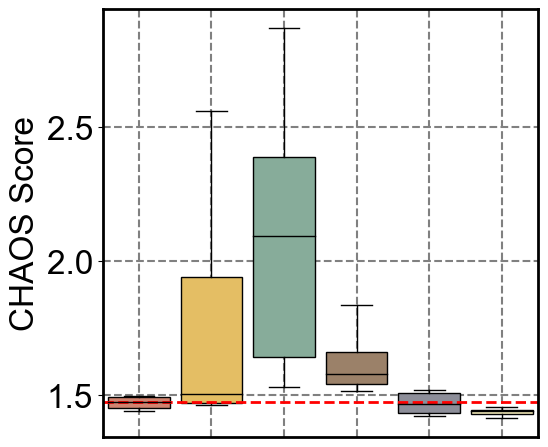

In [ ]:
# Define methods and corresponding colors
methods = ['SpaKnit', 'SpatialGlue', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN']
colors = ['#D0836F', '#E4BE64', '#87AC9A', '#9B8169', '#8D8E99', '#F5ECBA']

# Set global font size and font
fontsize = 24
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = fontsize

# Iterate through each slice
for slice_name in slices:
    # Get the CHAOS score data for the current slice
    chaos_scores = adata_results[slice_name]['chaos_scores']
    
    # Prepare data: CHAOS scores for each method
    data = [chaos_scores[method] for method in methods]
    
    # Calculate the medians of Modality1 and Modality2 separately
    median_modality1 = np.median(data[0])  # Median of Modality1
    median_modality2 = np.median(data[1])  # Median of Modality2
    
    # Determine the best performance between the two medians
    max_median = min(median_modality1, median_modality2)
    
    # Automatically calculate the y-axis range
    all_scores = np.concatenate(data)  # Combine all data into one array
    y_min = np.min(all_scores) - 0.05 * (np.max(all_scores) - np.min(all_scores))  # Slightly less than the minimum value
    y_max = np.max(all_scores) + 0.05 * (np.max(all_scores) - np.min(all_scores))  # Slightly more than the maximum value
    
    # Create a new figure
    plt.figure(figsize=(6, 5))
    
    # Draw the boxplot
    bp = plt.boxplot(data, patch_artist=True,
                     boxprops=dict(linestyle='-', linewidth=1, edgecolor='black'),  # Box edges
                     medianprops=dict(linestyle='-', linewidth=1, color='black'),  # Median line
                     whiskerprops=dict(linestyle='-', linewidth=1, color='black'),  # Whiskers
                     capprops=dict(linestyle='-', linewidth=1, color='black'),  # Caps
                     widths=0.85,  # Box width
                     showfliers=False)  # Do not show outliers
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Remove x-axis tick labels
    plt.xticks([])  # Remove x-axis tick labels
    
    # Set the unified y-axis range
    plt.ylim(y_min, y_max)
    
    # Add y-axis label
    plt.ylabel('CHAOS Score', fontsize=fontsize)
    
    # Thicken the plot's border
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)
    
    # Add grid lines
    plt.grid(axis='y', color='gray', linestyle='--', alpha=1, zorder=-10, linewidth=1.5)
    
    # Add vertical dashed lines
    for x in range(1, len(methods) + 1):
        plt.axvline(x=x, color='gray', linestyle='--', alpha=1, zorder=-10, linewidth=1.5)
    
    # Draw a horizontal line to represent the best median performance
    plt.axhline(y=max_median, color='red', linestyle='--', linewidth=2)
    
    # Print plotting information
    print(f"Drawing plot for {slice_name} - CHAOS Score")

    plt.tight_layout()
    
    # Save the image
    save_path = f"./replicate{slice_name}/"
    plt.savefig(save_path + f"CHAOS_Score.png", dpi=500)
    plt.savefig(save_path + f"CHAOS_Score.eps")
    
    plt.show()